# Task 1: Linear Filter
You are required to implement the Smoothing Operation with Average Filter (Box & Weighted Average filters). Both filters can contain user defined parameters to obtain different levels of blurring effects, which is the size of the filter in this case. Complete the following two functions

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(img, title=None):
    plt.figure()
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

from PIL import Image
# !wget https://imgs.search.brave.com/WV8OOMQ7Cdr85NpJeqB0JKJfHbX4CY8gK7f7B-y3oM8/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9vbmxp/bmV0b29scy5jb20v/aW1hZ2VzL2V4YW1w/bGVzLW9ubGluZWlt/YWdldG9vbHMvcmVk/LWdlcmJlcmEtZmxv/d2VyLWdyYXlzY2Fs/ZS5qcGc


In [14]:
def boxFilter(image, size):
    image = np.array(image, dtype=float)
    if len(image.shape) == 3:
        result = np.zeros_like(image)
        for c in range(3):
            channel = image[:, :, c]
            pad = size // 2
            channel_padded = np.pad(channel, pad, mode='constant')
            blur_channel = np.zeros_like(channel, dtype=float)
            kernel = np.ones((size, size)) / (size * size)
            for i in range(channel.shape[0]):
                for j in range(channel.shape[1]):
                    region = channel_padded[i:i+size, j:j+size]
                    blur_channel[i, j] = np.sum(region * kernel)
            result[:, :, c] = blur_channel
        return result
    else:
        pad = size // 2
        image_padded = np.pad(image, pad, mode='constant')
        blur_image = np.zeros_like(image, dtype=float)
        kernel = np.ones((size, size)) / (size * size)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                region = image_padded[i:i+size, j:j+size]
                blur_image[i, j] = np.sum(region * kernel)
        return blur_image

def weightedFilter(image, size):
    image = np.array(image, dtype=float)
    if len(image.shape) == 3:
        result = np.zeros_like(image)
        for c in range(3):
            channel = image[:, :, c]
            pad = size // 2
            channel_padded = np.pad(channel, pad, mode='constant')
            blur_channel = np.zeros_like(channel, dtype=float)
            x = np.linspace(-1, 1, size)
            xx, yy = np.meshgrid(x, x)
            kernel = np.exp(-(xx**2 + yy**2))
            kernel /= np.sum(kernel)
            for i in range(channel.shape[0]):
                for j in range(channel.shape[1]):
                    region = channel_padded[i:i+size, j:j+size]
                    blur_channel[i, j] = np.sum(region * kernel)
            result[:, :, c] = blur_channel
        return result
    else:
        pad = size // 2
        image_padded = np.pad(image, pad, mode='constant')
        blur = np.zeros_like(image, dtype=float)
        x = np.linspace(-1, 1, size)
        xx, yy = np.meshgrid(x, x)
        kernel = np.exp(-(xx**2 + yy**2))
        kernel /= np.sum(kernel)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                region = image_padded[i:i+size, j:j+size]
                blur[i, j] = np.sum(region * kernel)
        return blur

# Task 1: Output and Analysis
For this task, use an appropriate color image from Chapter 06.zip. Use your previously implemented functions to show the outputs of the two averaging filters on the sample image in both RGB and HSV color spaces. Provide your analysis on the following topics:
<ol>
<li> Explain how the parameters affect the increase or decrease of the blurring effect. </li>

<li> Do we require intensity scaling after applying averaging filters? </li>

<li> Is there any differences observed between the results of RGB and HSV color spaces? </li>
</ol>

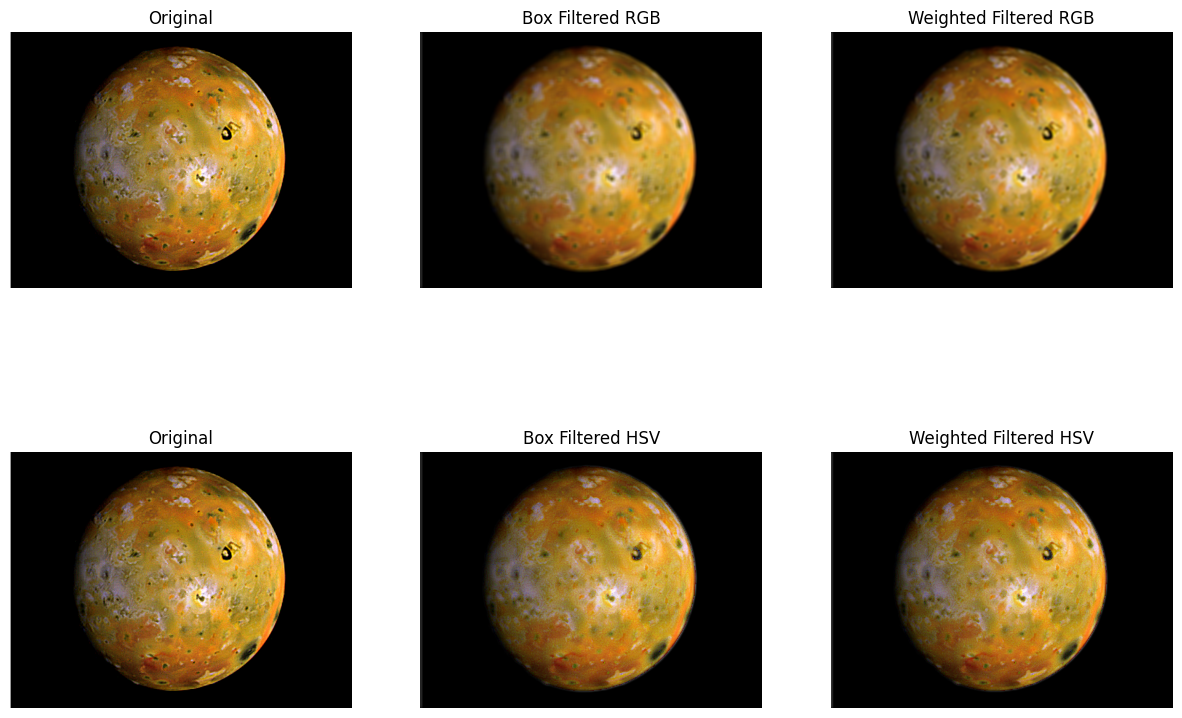

In [15]:
# Generate outputs for Task 1 here
# Load a color image
img_pil = Image.open('1.tif')
img_np = np.array(img_pil)

# If grayscale, convert to RGB for demo
if len(img_np.shape) == 2:
    img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)

# RGB processing
box_rgb = boxFilter(img_np, 7)
weighted_rgb = weightedFilter(img_np, 7)

# HSV processing
img_hsv = cv2.cvtColor(img_np, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)
v_box = boxFilter(v, 7).astype(np.uint8)
v_weighted = weightedFilter(v, 7).astype(np.uint8)
hsv_box = cv2.merge([h, s, v_box])
rgb_box_hsv = cv2.cvtColor(hsv_box, cv2.COLOR_HSV2RGB)
hsv_weighted = cv2.merge([h, s, v_weighted])
rgb_weighted_hsv = cv2.cvtColor(hsv_weighted, cv2.COLOR_HSV2RGB)

# Plot side by side
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(img_np)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(box_rgb.astype(np.uint8))
axes[0, 1].set_title('Box Filtered RGB')
axes[0, 1].axis('off')

axes[0, 2].imshow(weighted_rgb.astype(np.uint8))
axes[0, 2].set_title('Weighted Filtered RGB')
axes[0, 2].axis('off')

axes[1, 0].imshow(img_np)  # Original again
axes[1, 0].set_title('Original')
axes[1, 0].axis('off')

axes[1, 1].imshow(rgb_box_hsv)
axes[1, 1].set_title('Box Filtered HSV')
axes[1, 1].axis('off')

axes[1, 2].imshow(rgb_weighted_hsv)
axes[1, 2].set_title('Weighted Filtered HSV')
axes[1, 2].axis('off')

# plt.savefig('output_images/task1.png')
plt.show()

## Analysis:
1. **How the parameters affect the blurring effect:** The primary parameter is the filter size, which determines the kernel dimensions. A larger size increases the number of pixels averaged for each output pixel, leading to more pronounced blurring as high-frequency details are suppressed. For example, a 3x3 kernel provides mild smoothing, while a 15x15 kernel can significantly reduce texture and noise but may cause loss of important features like edges.

2. **Intensity scaling after averaging filters:** Intensity scaling is not required because averaging operations naturally produce values within the valid range. Since the kernel weights sum to 1, the output is a convex combination of input intensities, ensuring values stay between 0 and 255 for 8-bit images without overflow or underflow.

3. **Differences between RGB and HSV:** In RGB color space, each channel (R, G, B) is filtered independently, which can lead to color artifacts or shifts if the blurring affects channels differently due to their correlation. HSV color space decouples intensity (V) from color information (H, S), so filtering only the V channel preserves hue and saturation, resulting in more natural-looking blurred images that maintain color fidelity.

# Task 2
For this task, you are required to write a function designed to artificially add Salt & Pepper noise to a given image. The function should contain a parameter called noise_level (value between 0 and 1) that determines the percentage of pixels that will be affected by Salt & Pepper noise.

Also, write three separate functions to implement the Median Filter, Min Filter, and Max Filter.

In [16]:
def get_region(img, x, y, size):
    pad = size // 2
    region = img[x:x+size, y:y+size]
    return region


def salt_and_pepper(image, noise_level):
    noisy_image = image.copy()
    total_pixels = image.size
    num_noisy = int(noise_level * total_pixels)

    # Random positions for noise
    coords = np.random.randint(0, total_pixels, num_noisy)

    flat = noisy_image.flatten()

    for idx in coords:
        flat[idx] = 255 if np.random.rand() < 0.5 else 0

    return flat.reshape(image.shape)


In [17]:
def medianFilter(noisy_image, size):
    noisy_image = np.array(noisy_image, dtype=float)
    if len(noisy_image.shape) == 3:
        result = np.zeros_like(noisy_image)
        for c in range(3):
            channel = noisy_image[:, :, c]
            pad = size // 2
            padded = np.pad(channel, pad, mode='edge')
            corrected = np.zeros_like(channel)
            for i in range(channel.shape[0]):
                for j in range(channel.shape[1]):
                    region = padded[i:i+size, j:j+size]
                    corrected[i, j] = np.median(region)
            result[:, :, c] = corrected
        return result
    else:
        pad = size // 2
        padded = np.pad(noisy_image, pad, mode='edge')
        corrected = np.zeros_like(noisy_image)
        for i in range(noisy_image.shape[0]):
            for j in range(noisy_image.shape[1]):
                region = padded[i:i+size, j:j+size]
                corrected[i, j] = np.median(region)
        return corrected

In [18]:
def minFilter(noisy_image, size):
    noisy_image = np.array(noisy_image, dtype=float)
    if len(noisy_image.shape) == 3:
        result = np.zeros_like(noisy_image)
        for c in range(3):
            channel = noisy_image[:, :, c]
            pad = size // 2
            padded = np.pad(channel, pad, mode='edge')
            corrected = np.zeros_like(channel)
            for i in range(channel.shape[0]):
                for j in range(channel.shape[1]):
                    region = padded[i:i+size, j:j+size]
                    corrected[i, j] = np.min(region)
            result[:, :, c] = corrected
        return result
    else:
        pad = size // 2
        padded = np.pad(noisy_image, pad, mode='edge')
        corrected = np.zeros_like(noisy_image)
        for i in range(noisy_image.shape[0]):
            for j in range(noisy_image.shape[1]):
                region = padded[i:i+size, j:j+size]
                corrected[i, j] = np.min(region)
        return corrected

In [19]:
def maxFilter(noisy_image, size):
    noisy_image = np.array(noisy_image, dtype=float)
    if len(noisy_image.shape) == 3:
        result = np.zeros_like(noisy_image)
        for c in range(3):
            channel = noisy_image[:, :, c]
            pad = size // 2
            padded = np.pad(channel, pad, mode='edge')
            corrected = np.zeros_like(channel)
            for i in range(channel.shape[0]):
                for j in range(channel.shape[1]):
                    region = padded[i:i+size, j:j+size]
                    corrected[i, j] = np.max(region)
            result[:, :, c] = corrected
        return result
    else:
        pad = size // 2
        padded = np.pad(noisy_image, pad, mode='edge')
        corrected = np.zeros_like(noisy_image)
        for i in range(noisy_image.shape[0]):
            for j in range(noisy_image.shape[1]):
                region = padded[i:i+size, j:j+size]
                corrected[i, j] = np.max(region)
        return corrected

# Task 2: Output and Analysis
Use your previously implemented functions to show the addition of salt & pepper noise to a sample image, as well as how your implemented filters can remove the noise.

Show the results for both RGB and HSV color spaces.

Provide your analysis on the following topic:
<ol>
<li> What happens when the noise level increases for a particular filter size? </li>

<li> How does filter size affect the noise reduction? </li>

<li> Is there any differences observed between the results of RGB and HSV color spaces? </li>
</ol>

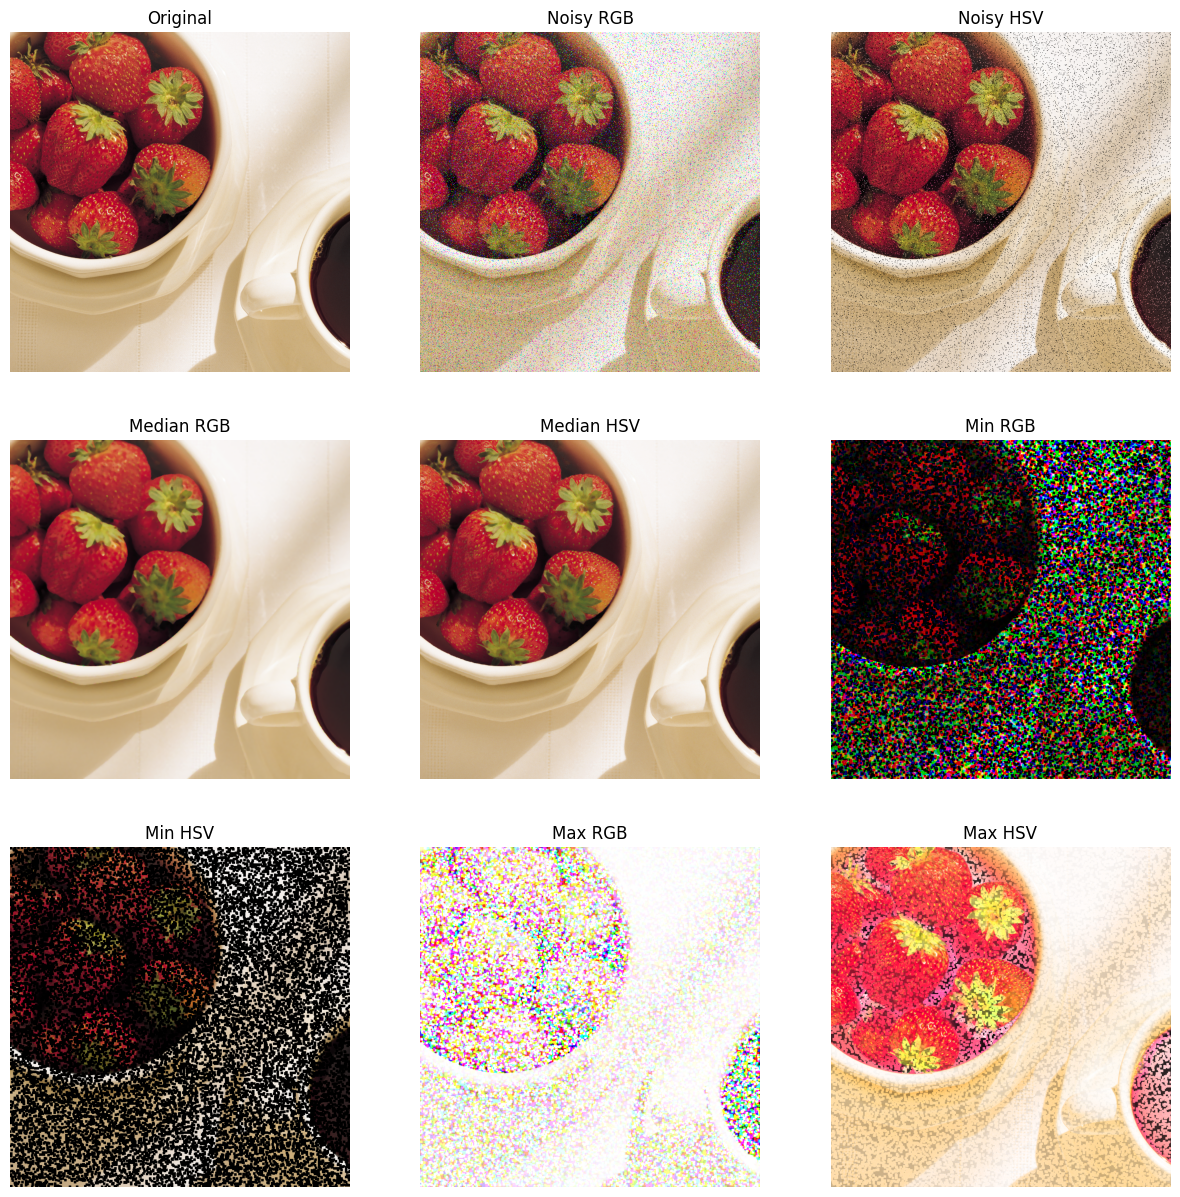

In [20]:
#Generate output for Task 2 here
img_pil = Image.open('2.tif')
img_np = np.array(img_pil)

# If grayscale, convert to RGB
if len(img_np.shape) == 2:
    img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)

# RGB processing
salt_and_peppered_rgb = salt_and_pepper(img_np, 0.1)
median_rgb = medianFilter(salt_and_peppered_rgb, 5)
min_rgb = minFilter(salt_and_peppered_rgb, 5)
max_rgb = maxFilter(salt_and_peppered_rgb, 5)

# HSV processing
img_hsv = cv2.cvtColor(img_np, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)
v_noisy = salt_and_pepper(v, 0.1)
hsv_noisy = cv2.merge([h, s, v_noisy])
rgb_noisy_hsv = cv2.cvtColor(hsv_noisy, cv2.COLOR_HSV2RGB)

v_median = medianFilter(v_noisy, 5).astype(np.uint8)
hsv_median = cv2.merge([h, s, v_median])
rgb_median_hsv = cv2.cvtColor(hsv_median, cv2.COLOR_HSV2RGB)

v_min = minFilter(v_noisy, 5).astype(np.uint8)
hsv_min = cv2.merge([h, s, v_min])
rgb_min_hsv = cv2.cvtColor(hsv_min, cv2.COLOR_HSV2RGB)

v_max = maxFilter(v_noisy, 5).astype(np.uint8)
hsv_max = cv2.merge([h, s, v_max])
rgb_max_hsv = cv2.cvtColor(hsv_max, cv2.COLOR_HSV2RGB)

# Plot side by side
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes[0, 0].imshow(img_np)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(salt_and_peppered_rgb.astype(np.uint8))
axes[0, 1].set_title('Noisy RGB')
axes[0, 1].axis('off')

axes[0, 2].imshow(rgb_noisy_hsv)
axes[0, 2].set_title('Noisy HSV')
axes[0, 2].axis('off')

axes[1, 0].imshow(median_rgb.astype(np.uint8))
axes[1, 0].set_title('Median RGB')
axes[1, 0].axis('off')

axes[1, 1].imshow(rgb_median_hsv)
axes[1, 1].set_title('Median HSV')
axes[1, 1].axis('off')

axes[1, 2].imshow(min_rgb.astype(np.uint8))
axes[1, 2].set_title('Min RGB')
axes[1, 2].axis('off')

axes[2, 0].imshow(rgb_min_hsv)
axes[2, 0].set_title('Min HSV')
axes[2, 0].axis('off')

axes[2, 1].imshow(max_rgb.astype(np.uint8))
axes[2, 1].set_title('Max RGB')
axes[2, 1].axis('off')

axes[2, 2].imshow(rgb_max_hsv)
axes[2, 2].set_title('Max HSV')
axes[2, 2].axis('off')

# plt.savefig('output_images/task2.png')
plt.show()

## Analysis:
1. **Effect of noise level increase:** As the noise level increases, more pixels are corrupted, making complete noise removal challenging. With higher noise density, even larger filters may leave residual noise, and the effectiveness of median filtering decreases if the noise exceeds 50\% in local neighborhoods, potentially leading to distorted outputs.

2. **Filter size effect on noise reduction:** Larger filter sizes consider more neighboring pixels, improving noise reduction by increasing the likelihood of including uncorrupted values in the median calculation. However, this comes at the cost of detail preservation, as edges and fine structures may be blurred or lost with oversized kernels.

3. **Differences between RGB and HSV:** RGB processing applies filters to each color channel separately, which can alter color relationships if noise affects channels unevenly. HSV processing focuses on the intensity channel (V), leaving color components untouched, thus maintaining color accuracy and avoiding artifacts that might arise from independent channel filtering.

# Task 3

For this task, you are required to design a Laplacian filter that will be used to compute edge responses. The function will return the edge response as an image, which will be called inside the sharpen function to generate a sharpened version of an image. The sharpen function contains a user defined parameter that can be used to control the level of sharpening.


In [21]:
def laplacian(image):
    image = np.array(image, dtype=float)
    if len(image.shape) == 3:
        result = np.zeros_like(image)
        for c in range(3):
            channel = image[:, :, c]
            kernel = np.array([[0, 1, 0],
                               [1, -4, 1],
                               [0, 1, 0]], dtype=float)
            edge_response = cv2.filter2D(channel, -1, kernel)
            result[:, :, c] = edge_response
        return result
    else:
        kernel = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]], dtype=float)
        edge_response = cv2.filter2D(image, -1, kernel)
        return edge_response

def sharpen(image, sharpen_level=1.0):
    img = np.array(image, dtype=float)
    if len(img.shape) == 3:
        result = np.zeros_like(img)
        for c in range(3):
            channel = img[:, :, c]
            edges = laplacian(channel)
            sharp_channel = channel + sharpen_level * edges
            result[:, :, c] = np.clip(sharp_channel, 0, 255)
        return Image.fromarray(result.astype(np.uint8))
    else:
        edges = laplacian(img)
        sharp_image = img + sharpen_level * edges
        sharp_image = np.clip(sharp_image, 0, 255).astype(np.uint8)
        return Image.fromarray(sharp_image)

# Task 3: Output and Analysis
Use your previously implemented laplacian function to show the edge response of a sample image. use an appropriate color image from Chapter 06.zip for this task. Next, show the sharpened image after using the sharpen function.

Show the results for both RGB and HSV color spaces.

Provide your analysis on the following topic:
<ol>
<li> Why do we require intensity scaling after computing the sharpening? </li>
<li> How does the value of sharpen_level affect the sharpening? </li>
<li> Is there any differences observed between the results of RGB and HSV color spaces? </li>

</ol>

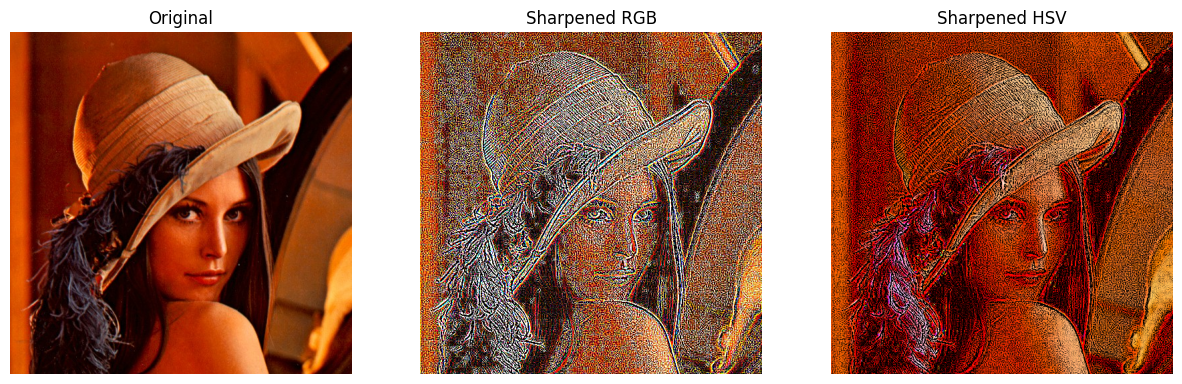

In [22]:
#Generate output for Task 3 here
img_pil = Image.open('3.tif')
img_np = np.array(img_pil)

# If grayscale, convert to RGB
if len(img_np.shape) == 2:
    img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)

# RGB sharpening
sharpened_rgb = sharpen(img_np, 20)

# HSV sharpening
img_hsv = cv2.cvtColor(img_np, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)
v_sharp = sharpen(v, 20)
hsv_sharp = cv2.merge([h, s, np.array(v_sharp)])
rgb_sharp_hsv = cv2.cvtColor(hsv_sharp, cv2.COLOR_HSV2RGB)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img_np)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(np.array(sharpened_rgb))
axes[1].set_title('Sharpened RGB')
axes[1].axis('off')

axes[2].imshow(rgb_sharp_hsv)
axes[2].set_title('Sharpened HSV')
axes[2].axis('off')

# plt.savefig('output_images/task3.png')
plt.show()

## Analysis:
1. **Why intensity scaling after sharpening:** Sharpening involves adding edge information to the original image, which can result in pixel values exceeding 255 or dropping below 0 due to the Laplacian's response. Clipping (or scaling) is necessary to constrain values to the displayable range, preventing overflow and maintaining image integrity.

2. **Effect of sharpen_level:** The sharpen_level parameter multiplies the Laplacian output before addition. Higher values amplify edge enhancement, making details crisper but risking oversharpening artifacts like ringing or noise amplification. Lower values provide subtle enhancement, preserving the natural look while still improving perceived sharpness.

3. **Differences between RGB and HSV:** Direct sharpening in RGB can introduce color halos or shifts because edges in different channels may not align perfectly. Sharpening only the value (V) channel in HSV enhances intensity details without affecting hue or saturation, leading to cleaner, more color-accurate results.

# Task 4

For this task, you are required to design a function that takes two parameters: an image and a value $k$. The function should perform Unsharp masking ($k=1$) and High-boost filtering ($k>1$) and return a filtered image.

In [23]:
def high_boost_filter(image, k, filter_size=5):
  original_image = image.copy().astype(np.float32)

  if len(original_image.shape) == 3:
      sharpened_channels = []
      for i in range(3):
          channel = original_image[:, :, i]

          blurred_channel = weightedFilter(channel, filter_size)

          mask = channel - blurred_channel

          sharpened_channel = channel + k * mask
          sharpened_channels.append(sharpened_channel)

      filtered_image = np.stack(sharpened_channels, axis=2)

  else:
      blurred_image = weightedFilter(original_image, filter_size)
      mask = original_image - blurred_image

      filtered_image = original_image + k * mask

  filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)

  return filtered_image

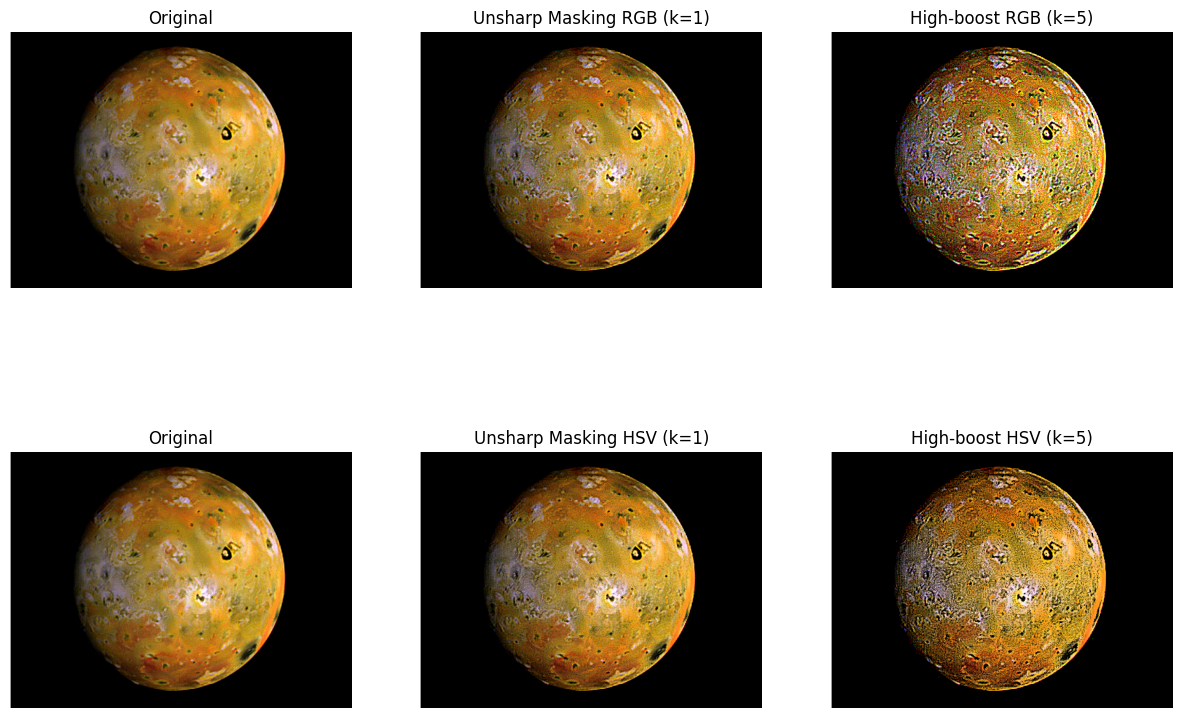

In [24]:
img_pil = Image.open('1.tif')
img_np = np.array(img_pil)

# If grayscale, convert to RGB
if len(img_np.shape) == 2:
    img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)

# Unsharp Masking (k=1) in RGB
unsharp_rgb = high_boost_filter(img_np, k=1, filter_size=7)

# High-boost Filtering (k=5) in RGB
highboost_rgb = high_boost_filter(img_np, k=5, filter_size=7)

img_hsv = cv2.cvtColor(img_np, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)

unsharp_v = high_boost_filter(v, k=1, filter_size=7)
unsharp_hsv_merged = cv2.merge([h, s, unsharp_v])
unsharp_hsv_rgb = cv2.cvtColor(unsharp_hsv_merged, cv2.COLOR_HSV2RGB)

highboost_v = high_boost_filter(v, k=5, filter_size=7)
highboost_hsv_merged = cv2.merge([h, s, highboost_v])
highboost_hsv_rgb = cv2.cvtColor(highboost_hsv_merged, cv2.COLOR_HSV2RGB)

# Plot side by side
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(img_np)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(unsharp_rgb)
axes[0, 1].set_title('Unsharp Masking RGB (k=1)')
axes[0, 1].axis('off')

axes[0, 2].imshow(highboost_rgb)
axes[0, 2].set_title('High-boost RGB (k=5)')
axes[0, 2].axis('off')

axes[1, 0].imshow(img_np)
axes[1, 0].set_title('Original')
axes[1, 0].axis('off')

axes[1, 1].imshow(unsharp_hsv_rgb)
axes[1, 1].set_title('Unsharp Masking HSV (k=1)')
axes[1, 1].axis('off')

axes[1, 2].imshow(highboost_hsv_rgb)
axes[1, 2].set_title('High-boost HSV (k=5)')
axes[1, 2].axis('off')

# plt.savefig('output_images/task4.png')
plt.show()

## Analysis:

1. **Differences in RGB and HSV:** In RGB, the sharpening operation is applied independently to each color channel, which can cause color imbalances or artifacts if the high-frequency components differ across channels. In HSV, only the value (intensity) channel is sharpened, preserving the color information (hue and saturation) intact, resulting in more visually pleasing and color-consistent outputs.

2. **What happens if $k<1$:** When $0 < k < 1$, the sharpening effect is reduced compared to unsharp masking ($k=1$), providing mild enhancement that emphasizes details less aggressively. At $k=0$, the image remains unchanged. For $k<0$, the process inverts, effectively blurring the image by subtracting amplified details, which can be used for smoothing but is not typical for sharpening applications.